Sally's notebook

In [13]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

In [14]:
df = pd.read_csv("kc_house_data.csv", index_col='id')

In [111]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [1]:
df.info()

NameError: name 'df' is not defined

In [15]:
#create new column that is a date-time object
df['DateTime'] = pd.to_datetime(df['date'])

In [3]:
df

NameError: name 'df' is not defined

In [7]:
df['DateTime'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: DateTime, Length: 372, dtype: int64

In [8]:
#check for nans
df['DateTime'].isna().sum()

0

In [16]:
#create function to add a column listing the season house was sold in

def season(date):
    month = int(date.split("/")[0])
    if (month == 12 or month == 1 or month == 2):
       return "WINTER"
    elif (month == 3 or month == 4 or month == 5):
       return "SPRING"
    elif (month == 6 or month == 7 or month == 8):
       return "SUMMER"
    else:
       return "FALL"

df['Season'] = df['date'].map(season)

In [36]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,DateTime,Season
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13,FALL
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09,WINTER
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015-02-25,WINTER
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09,WINTER
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014-05-21,SPRING
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015-02-23,WINTER
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014-06-23,SUMMER


In [17]:
#create column that lists year house was built as date time format
df['yr_built'] = pd.to_datetime(df.yr_built, format = '%Y')


In [18]:
#create a column that identifies if a home has been renovated
df.loc[df['yr_renovated']>0, "Renovated"] = "Yes"
df.loc[df['yr_renovated']==0, "Renovated"] = "No"

In [163]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,DateTime,Season,Renovated
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13,FALL,No
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09,WINTER,Yes
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062,2015-02-25,WINTER,NaN
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09,WINTER,No
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18,WINTER,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009-01-01,0.0,98103,47.6993,-122.346,1530,1509,2014-05-21,SPRING,No
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014-01-01,0.0,98146,47.5107,-122.362,1830,7200,2015-02-23,WINTER,No
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009-01-01,0.0,98144,47.5944,-122.299,1020,2007,2014-06-23,SUMMER,No


In [12]:
df['Renovated'].value_counts()

No     17011
Yes      744
Name: Renovated, dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  object        
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  datetime64[ns]
 14  yr_renovated   17755 non-null  float64       
 15  zipco

In [19]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file("Geospatial_files/Zipcodes_for_King_County.shp")

In [21]:
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df.long, df.lat)]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

In [22]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,DateTime,Season,Renovated,geometry
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13,FALL,No,POINT (-122.25700 47.51120)
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09,WINTER,Yes,POINT (-122.31900 47.72100)
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,NaN,98028,47.7379,-122.233,2720,8062,2015-02-25,WINTER,NaN,POINT (-122.23300 47.73790)
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09,WINTER,No,POINT (-122.39300 47.52080)
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18,WINTER,No,POINT (-122.04500 47.61680)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,98103,47.6993,-122.346,1530,1509,2014-05-21,SPRING,No,POINT (-122.34600 47.69930)
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,98146,47.5107,-122.362,1830,7200,2015-02-23,WINTER,No,POINT (-122.36200 47.51070)
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,98144,47.5944,-122.299,1020,2007,2014-06-23,SUMMER,No,POINT (-122.29900 47.59440)


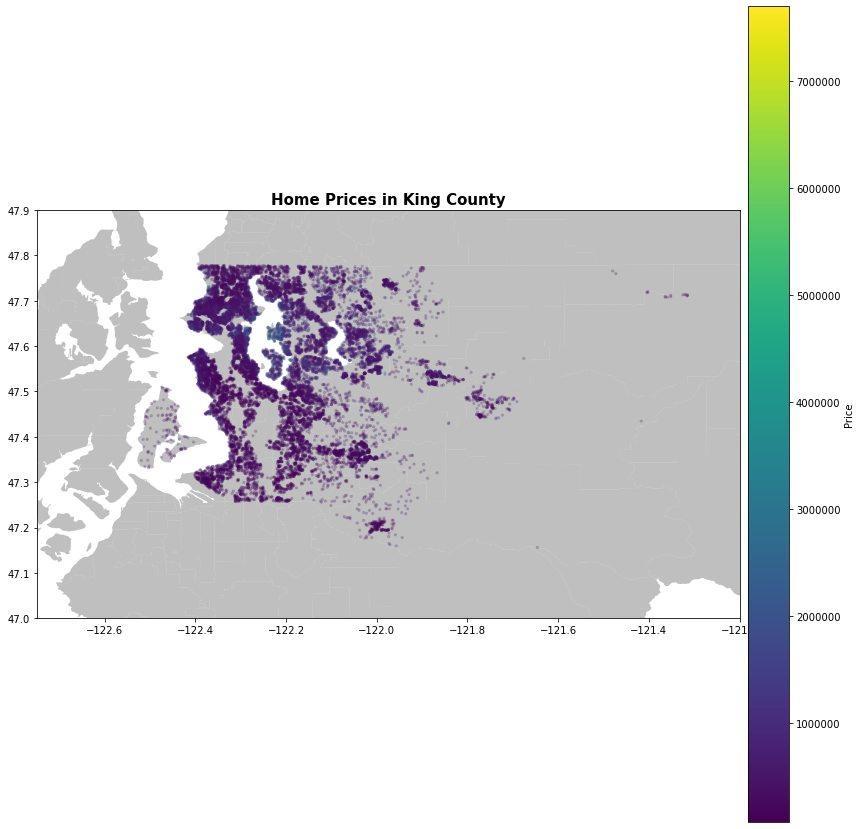

In [91]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5,color="grey")
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column="price", ax=ax, alpha=0.2, legend=True, markersize=5, legend_kwds={'label': "Price",
                                   'pad': 0.01,
                                   'format': '%.0f'})
# add title to graph
plt.title("Home Prices in King County", fontsize=15,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.xlim(-122.75,-121.2)
plt.ylim( 47.0,47.9)
pd.options.display.float_format = '{:.2f}'.format
# show map
plt.show()


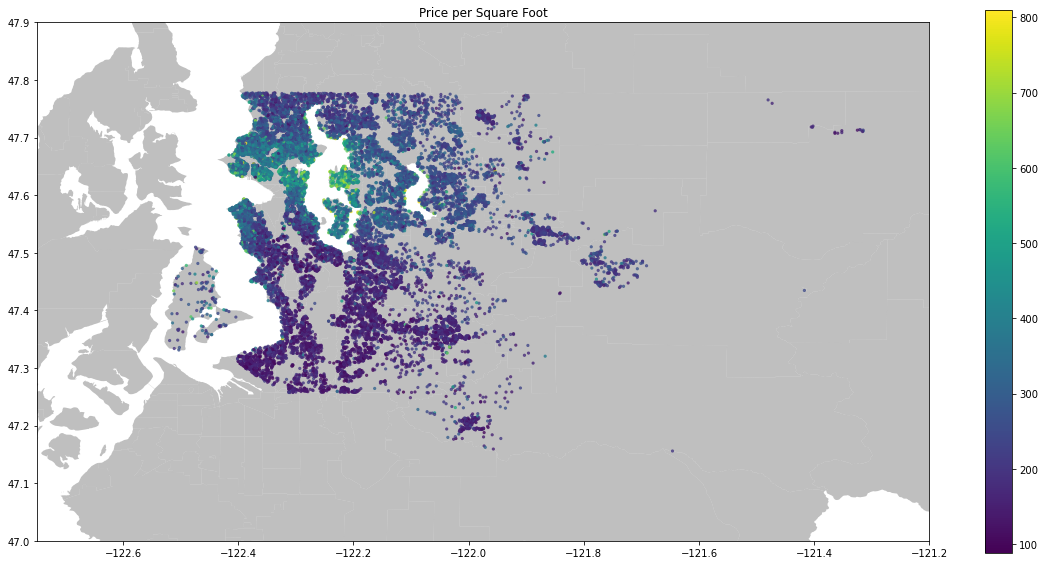

In [60]:
df['ppsf'] = df.price/df.sqft_living
fig, ax = plt.subplots(figsize=(20,10))

street_map.plot(ax=ax, alpha=0.5,color="grey")
geo_df.plot(column="ppsf", ax=ax, alpha=0.7, legend=True, markersize=5)
# sns.scatterplot(data=df,x="long", y="lat", hue= 'ppsf')
# plt.scatter(df_out['long'], df_out['lat'], c=df_out['price_per_sqft'],s=1)
#plt.colorbar().set_label('price per Sqft', fontsize=14)

plt.xlim(-122.75,-121.2)
plt.ylim( 47.0,47.9)
plt.title('Price per Square Foot')
plt.show()